In [8]:

# NOTEBOOK 04 — EDA ENGINE


import os
import glob
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use("default")

# Locate the latest cleaned CSV file

cleaned_folder = "../data/cleaned"

# Find all cleaned CSV files
cleaned_files = glob.glob(os.path.join(cleaned_folder, "*.csv"))

if not cleaned_files:
    raise FileNotFoundError(
        " No cleaned CSV files found in '../data/cleaned/'. "
        "Please run Notebook 03 (Data Cleaner) first."
    )

# Pick the latest file based on modified timestamp
latest_cleaned_file = max(cleaned_files, key=os.path.getmtime)

print(" Using cleaned dataset:", latest_cleaned_file)

# Load dataset
# ------------------------------------------------
df = pd.read_csv(latest_cleaned_file)

# Quick preview
# ------------------------------------------------
print("\n Dataset loaded successfully!")
print("Shape:", df.shape)

df.head()


 Using cleaned dataset: ../data/cleaned\cleaned_dataset_20251124_105754.csv

 Dataset loaded successfully!
Shape: (150, 5)


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-Setosa
1,4.9,3.0,1.4,0.2,Iris-Setosa
2,4.7,3.2,1.3,0.2,Iris-Setosa
3,4.6,3.1,1.5,0.2,Iris-Setosa
4,5.0,3.6,1.4,0.2,Iris-Setosa


In [6]:

# Count missing values in each column
missing_count = df.isnull().sum()

# Calculate missing percentage for each column
missing_percent = (missing_count / len(df)) * 100

missing_summary = pd.DataFrame({
    "missing_count": missing_count,
    "missing_percent": missing_percent.round(2)
}).sort_values(by="missing_percent", ascending=False)

print(" Missing Values Summary:")
missing_summary

#some basic stats :-

print("\n Descriptive Statistics (Numeric Columns):")
numeric_summary = df.describe(include=[np.number]).T
numeric_summary

print("\n Descriptive Statistics (Categorical Columns):")
categorical_summary = df.describe(include=['object', 'category']).T
categorical_summary


 Missing Values Summary:

 Descriptive Statistics (Numeric Columns):

 Descriptive Statistics (Categorical Columns):


,count,unique,top,freq
Species,150,3,Iris-Setosa,50


In [8]:


# Data types of each column
dtypes_summary = df.dtypes

print(" Column Data Types:")
dtypes_summary


# Unique value counts
unique_counts = df.nunique()

print("\n Unique Values per Column:")
unique_counts.sort_values(ascending=False)


 Column Data Types:

 Unique Values per Column:


PetalLengthCm    43
SepalLengthCm    35
SepalWidthCm     23
PetalWidthCm     22
Species           3
dtype: int64

 Correlation Matrix:


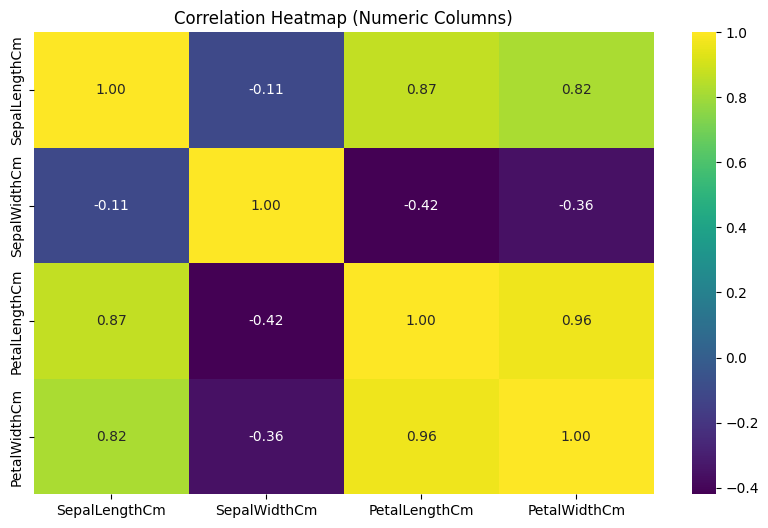

In [9]:
# correaltion matrix

# Select numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Compute correlation matrix
corr_matrix = numeric_df.corr()

print(" Correlation Matrix:")
corr_matrix


# heatmap for same :-
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="viridis")
plt.title("Correlation Heatmap (Numeric Columns)")
plt.show()


 Plotting histograms for: ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']


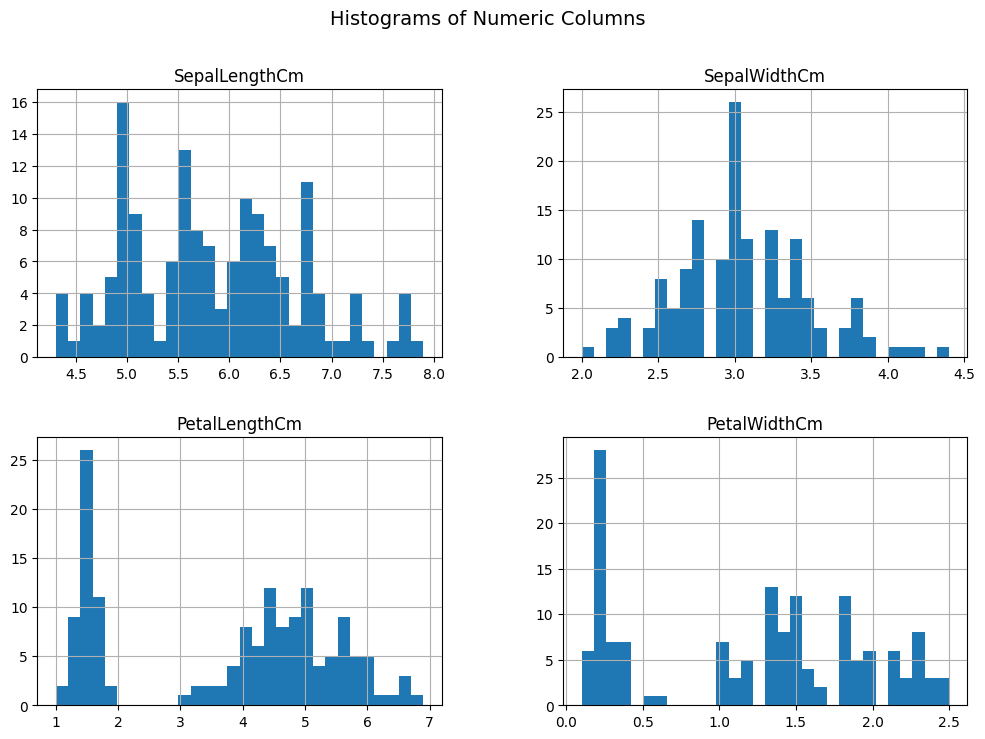

In [10]:
# hhistogram for numeric columns

# Select numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

print(" Plotting histograms for:", list(numeric_cols))

# Plot each numeric column
df[numeric_cols].hist(figsize=(12, 8), bins=30)
plt.suptitle("Histograms of Numeric Columns", fontsize=14)
plt.show()


 Plotting countplots for: ['Species']


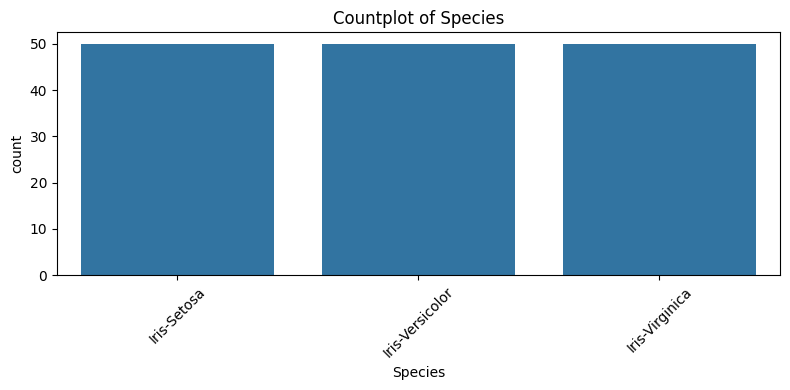

In [11]:
#  Countplots for categorical columns


# Select categorical columns
cat_cols = df.select_dtypes(include=['object', 'category']).columns

print(" Plotting countplots for:", list(cat_cols))

# Create one plot per categorical column
for col in cat_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col)
    plt.title(f"Countplot of {col}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


 Target Column Detected: Species


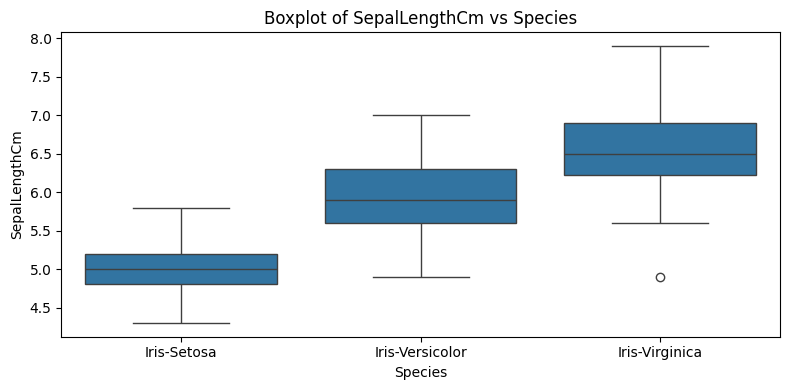

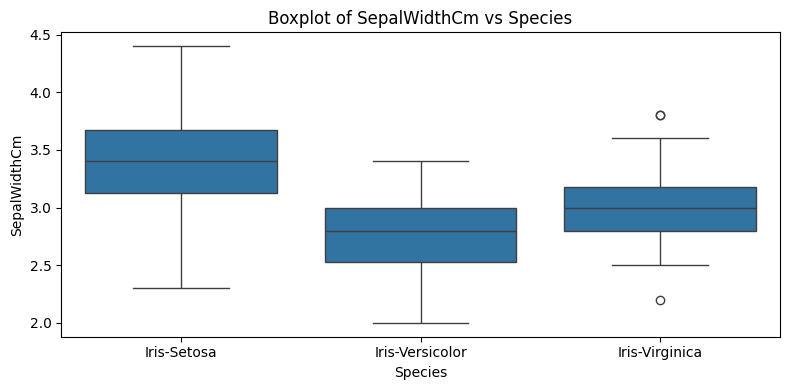

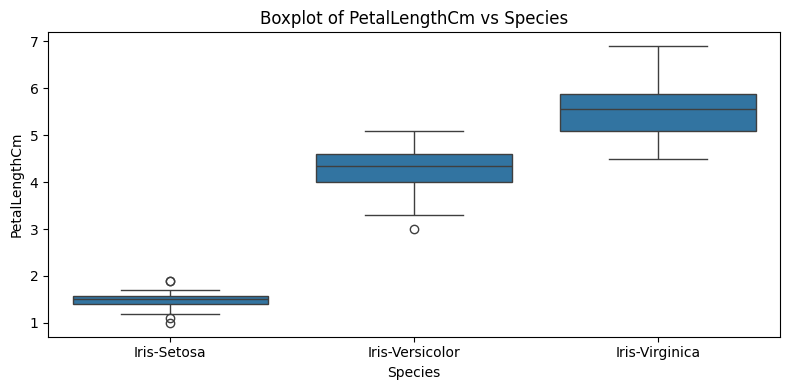

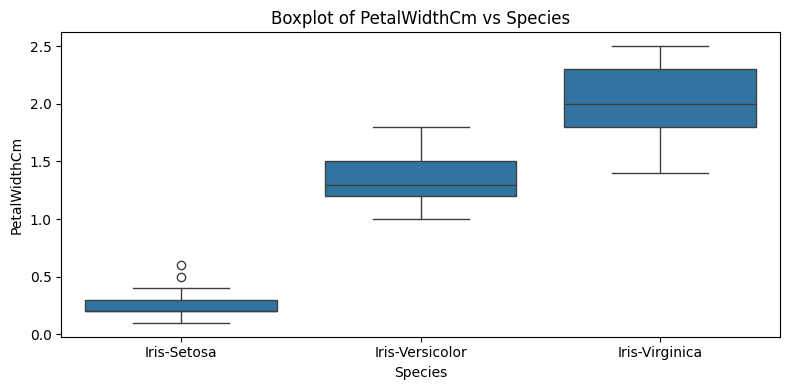

In [12]:
# box plot :- numneric cols v target

# Try detecting target column
possible_targets = [c for c in df.columns if c.lower() in ["target", "label", "class", "outcome"]]

if len(possible_targets) > 0:
    target_col = possible_targets[0]
else:
    # fallback: assume last categorical column is target
    cat_cols = df.select_dtypes(include=['object', 'category']).columns
    target_col = cat_cols[-1] if len(cat_cols) > 0 else None

print(" Target Column Detected:", target_col)

# If no target, skip boxplots
if target_col is None:
    print(" No categorical target found. Skipping boxplots.")
else:
    numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

    for col in numeric_cols:
        plt.figure(figsize=(8, 4))
        sns.boxplot(x=df[target_col], y=df[col])
        plt.title(f"Boxplot of {col} vs {target_col}")
        plt.tight_layout()
        plt.show()


 Generating pairplot for: ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']


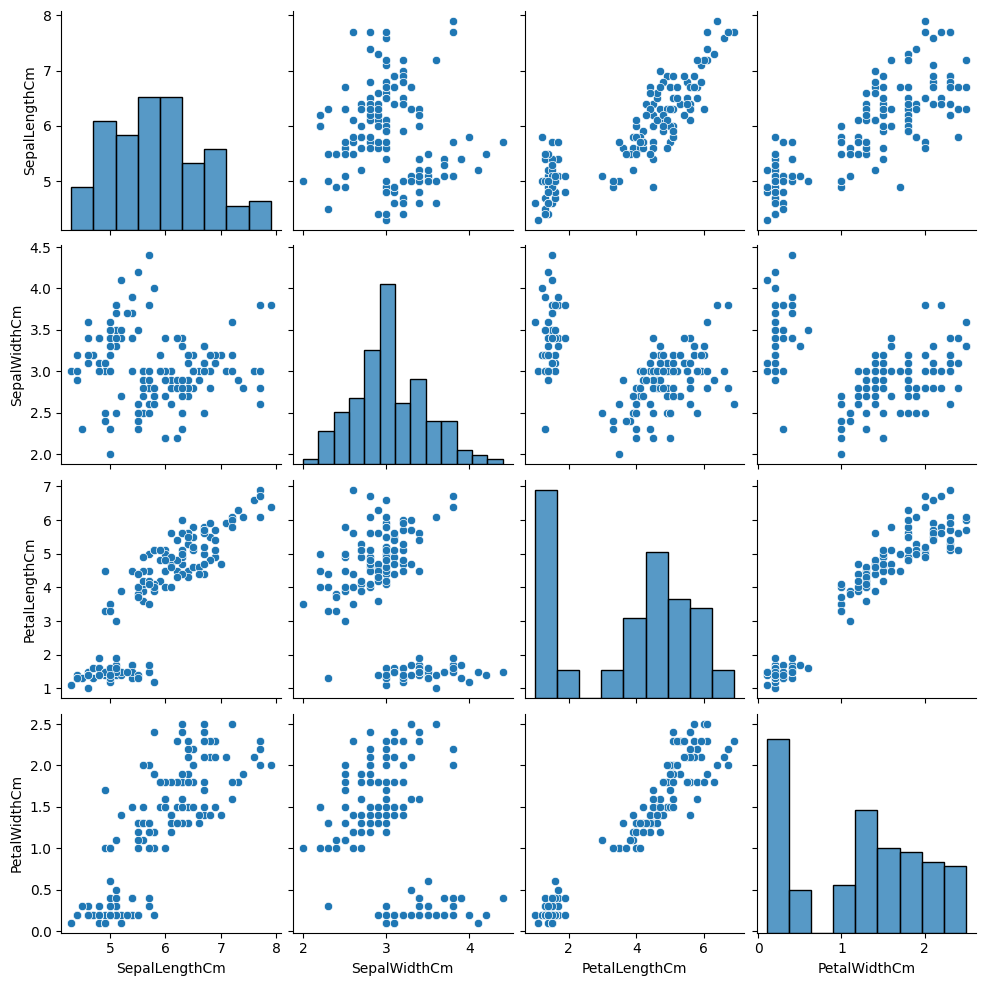

In [13]:
# pairplots for num cols

# Select numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# If too many numeric columns, limit (pairplots get heavy)
if len(numeric_cols) > 6:
    print(" Too many numeric columns. Showing only first 6 for pairplot.")
    numeric_cols = numeric_cols[:6]

print(" Generating pairplot for:", list(numeric_cols))

# Pairplot (no hue by default)
sns.pairplot(df[numeric_cols])
plt.show()


In [19]:
!pip install sweetviz


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/15.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/15.1 MB ? eta -:--:--
    --------------------------------------- 0.3/15.1 MB ? eta -:--:--
   -- ------------------------------------- 0.8/15.1 MB 1.3 MB/s eta 0:00:11
   -- ------------------------------------- 1.0/15.1 MB 1.3 MB/s eta 0:00:11
   --- ------------------------------------ 1.3/15.1 MB 1.3 MB/s eta 0:00:11
   ---- ----------------------------------- 1.6/15.1 MB 1.3 MB/s eta 0:00:11
   ---- ----------------------------------- 1.8/15.1 MB 1.3 MB/s eta 0:00:11
   ----- ---------------------------------- 2.1/15.1 MB 1.3 MB/s eta 0:00:10
   ------ --------------------------------- 2.4/15.1 MB 1.3 MB/s eta 0:00:10
   ------ --------------------------------- 2.6/15.1 MB 1.3 MB/s eta 0:00:10
   ------- -------------------------------- 2.9/15.1 MB 1.3 MB/s eta 0:00:10
   -------- -------


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [21]:
!pip install dtale



Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 0.0/642.7 kB ? eta -:--:--
     ---------------- ----------------------- 262.1/642.7 kB ? eta -:--:--
     ------------------------------ ------- 524.3/642.7 kB 1.3 MB/s eta 0:00:01
     ---------------------------------------- 642.7/642.7 kB 1.3 MB/s  0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached statsmodels-0.14.5-cp312-cp312-win_amd64.whl.metadata (9.8 kB)
   ---------------------------------------- 0.0/17.6 MB ? eta -:--:--
    --------------------------------------- 0.3/17.6 MB ? eta -:--:--
   - -------------------------------------- 0.5/17.6 MB 1.3 MB/s eta 0:00:14
   - -------------------------------------- 0.8/17.6 MB 1.3 MB/s eta 0:00:14
   -- ------------------------------------- 1.0/17.6 MB 1.3 MB/s eta 0:00:13
   -- ------------------------------------- 1.3/17.6 MB 1.3 MB/s

  DEPRECATION: Building 'dash_daq' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'dash_daq'. Discussion can be found at https://github.com/pypa/pip/issues/6334

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
!pip install ydata-profiling==4.6.3




Defaulting to user installation because normal site-packages is not writeable


ERROR: Ignored the following versions that require a different python version: 4.0.0 Requires-Python >=3.7,<3.11; 4.1.0 Requires-Python >=3.7,<3.12; 4.1.1 Requires-Python >=3.7,<3.12; 4.1.2 Requires-Python >=3.7,<3.12; 4.2.0 Requires-Python >=3.7,<3.12; 4.3.0 Requires-Python >=3.7,<3.12; 4.3.1 Requires-Python >=3.7,<3.12; 4.3.2 Requires-Python >=3.7,<3.12; 4.4.0 Requires-Python >=3.7,<3.12; 4.5.0 Requires-Python >=3.7,<3.12; 4.5.1 Requires-Python >=3.7,<3.12; 4.6.0 Requires-Python >=3.7,<3.12; 4.6.1 Requires-Python >=3.7,<3.12; 4.6.2 Requires-Python >=3.7,<3.12; 4.6.3 Requires-Python >=3.7,<3.12; 4.6.4 Requires-Python >=3.7,<3.12; 4.6.5 Requires-Python >=3.7,<3.12
ERROR: Could not find a version that satisfies the requirement ydata-profiling==4.6.3 (from versions: 4.7.0, 4.8.3, 4.9.0, 4.10.0, 4.11.0, 4.12.0, 4.12.1, 4.12.2, 4.13.0, 4.14.0, 4.15.0, 4.15.1, 4.16.0, 4.16.1, 4.17.0, 4.18.0)

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: C:\Program Files\

In [3]:
# Generate and save HTML profiling report


from ydata_profiling import ProfileReport
import datetime

# Create profiling object
profile = ProfileReport(df, title="CortexAI EDA Report", explorative=True)

# Timestamped output path
timestamp = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")
output_path = f"../results/eda_reports/eda_report_{timestamp}.html"


profile.to_file(output_path)

print(" EDA profiling report saved at:")
print(output_path)


ModuleNotFoundError: No module named 'ydata_profiling'

In [4]:
import sys
print(sys.executable)
print(sys.version)


c:\Users\chala\AppData\Local\Programs\Python\Python310\python.exe
3.10.11 (tags/v3.10.11:7d4cc5a, Apr  5 2023, 00:38:17) [MSC v.1929 64 bit (AMD64)]


In [5]:
import sys
!{sys.executable} -m pip install ydata-profiling==4.6.3


     ---------------------------------------- 0.0/357.6 kB ? eta -:--:--
     ---- ---------------------------------- 41.0/357.6 kB 1.9 MB/s eta 0:00:01
     ---------- ---------------------------- 92.2/357.6 kB 1.7 MB/s eta 0:00:01
     --------------- ---------------------- 143.4/357.6 kB 1.4 MB/s eta 0:00:01
     --------------------- ---------------- 204.8/357.6 kB 1.4 MB/s eta 0:00:01
     --------------------------- ---------- 256.0/357.6 kB 1.3 MB/s eta 0:00:01
     -------------------------------- ----- 307.2/357.6 kB 1.4 MB/s eta 0:00:01
     ------------------------------------ - 348.2/357.6 kB 1.4 MB/s eta 0:00:01
     -------------------------------------- 357.6/357.6 kB 1.2 MB/s eta 0:00:00
     ---------------------------------------- 0.0/296.5 kB ? eta -:--:--
     ---- ----------------------------------- 30.7/296.5 kB ? eta -:--:--
     ------------ -------------------------- 92.2/296.5 kB 1.7 MB/s eta 0:00:01
     ------------------ ------------------- 143.4/296.5 kB 1

  DEPRECATION: htmlmin is being installed using the legacy 'setup.py install' method, because it does not have a 'pyproject.toml' and the 'wheel' package is not installed. pip 23.1 will enforce this behaviour change. A possible replacement is to enable the '--use-pep517' option. Discussion can be found at https://github.com/pypa/pip/issues/8559

[notice] A new release of pip is available: 23.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
from ydata_profiling import ProfileReport
print("Imported successfully!")


c:\Users\chala\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Imported successfully!


In [9]:
# Generate and save HTML profiling report


from ydata_profiling import ProfileReport
import datetime

profile = ProfileReport(df, title="CortexAI EDA Report", explorative=True)

timestamp = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")
output_path = f"../results/eda_reports/eda_report_{timestamp}.html"

profile.to_file(output_path)

print(" EDA profiling report saved at:")
print(output_path)


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 305.84it/s]

 EDA profiling report saved at:
../results/eda_reports/eda_report_20251127_224645.html


In [10]:
# Save EDA summary as JSON for the app

import json
import datetime

eda_summary = {
    "shape": df.shape,
    "column_types": df.dtypes.astype(str).to_dict(),
    "missing_values": df.isnull().sum().to_dict(),
    "numeric_summary": df.describe(include=[np.number]).to_dict(),
    "categorical_summary": df.describe(include=['object', 'category']).to_dict()
}

# Save with timestamp
timestamp = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")
output_path = f"../results/eda_reports/eda_summary_{timestamp}.json"

with open(output_path, "w") as f:
    json.dump(eda_summary, f, indent=4)

print(" EDA summary saved at:")
print(output_path)


 EDA summary saved at:
../results/eda_reports/eda_summary_20251127_224904.json
